In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Flatten,BatchNormalization

from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seed = 16
filename = 'fer2013.csv'
label_map = ['Enfado', 'Asco', 'Miedo', 'Alegria', 'Tristeza', 'Sorpresa', 'Neutral']
names=['emocion','pixels','uso']
df=pd.read_csv('../Datos/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emocion,pixels,uso
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [3]:
def getData(filname):
    # Las imagenes 48x48 en grayscale (de 0 a 255)
    # N = 35887 (28709 de entrenamiento y 2304 de testeo)
    Y_train = []
    X_train = []
    Y_test = []
    X_test = []
    
    first = True
    uso = 'Training\n'
    for line in open(filname):
        #This condition skips the first condition
        if first:
            first = False
        else:
            row = line.split(',')
            condition = str(row[2])
            if condition == uso:
                Y_train.append(int(row[0]))
                X_train.append([int(p) for p in row[1].split()])
            else:
                Y_test.append(int(row[0]))
                X_test.append([int(p) for p in row[1].split()])
                
    X_train, Y_train = np.array(X_train)/255.0 , np.array(Y_train)
    X_test, Y_test = np.array(X_test)/255.0 , np.array(Y_test)

    return X_train, X_test, Y_train, Y_test 

In [4]:
X_train, X_test, Y_train, Y_test= getData("../Datos/fer2013.csv")

In [5]:
N_train = X_train.shape[0]
N_test = X_test.shape[0]

In [6]:
X_train = X_train.reshape(N_train, 48, 48,1)
X_test = X_test.reshape(N_test, 48, 48,1)

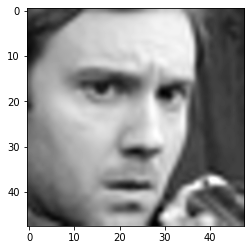

In [7]:
img = X_train[0].reshape(48,48)
plt.imshow(img,cmap = 'gray', interpolation = 'spline16')
plt.show()

In [8]:
cont_train = [0,0,0,0,0,0,0]
for j in Y_train:
    cont_train[j] += 1
cont_test = [0,0,0,0,0,0,0]
for j in Y_test:
    cont_test[j] += 1

In [9]:
print(cont_train)
print(cont_test)

[3995, 436, 4097, 7215, 4830, 3171, 4965]
[958, 111, 1024, 1774, 1247, 831, 1233]


In [10]:
# one hot encode output
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
class_num = Y_test.shape[1]

In [11]:
model = Sequential()


In [12]:
model.add(Conv2D(36,(2,2),input_shape=X_train.shape[1:],padding = 'same', activation = 'relu'))
model.add(Conv2D(36,(2,2),input_shape=X_train.shape[1:],padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Conv2D(64, (2, 2), padding='same', activation = 'relu'))
model.add(Conv2D(64, (2, 2), padding='same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [14]:
model.add(Conv2D(128, (2, 2), padding='same', activation = 'relu'))
model.add(Conv2D(128, (2, 2), padding='same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 36)        180       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 36)        5220      
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 36)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        9280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0

In [15]:
model.add(Flatten())
model.add(Dense(192, activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dense(class_num, activation='softmax',kernel_constraint=maxnorm(3)))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 36)        180       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 36)        5220      
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 36)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        9280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0

In [17]:
epochs = 15
optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
np.random.seed(16)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=64)

Epoch 1/15
449/449 [==============================] - 173s 386ms/step - loss: 1.7000 - accuracy: 0.3190 - val_loss: 1.5788 - val_accuracy: 0.4064
Epoch 2/15
449/449 [==============================] - 175s 390ms/step - loss: 1.4657 - accuracy: 0.4370 - val_loss: 1.4242 - val_accuracy: 0.4625
Epoch 3/15
449/449 [==============================] - 173s 384ms/step - loss: 1.3413 - accuracy: 0.4860 - val_loss: 1.3733 - val_accuracy: 0.4767
Epoch 4/15
449/449 [==============================] - 189s 422ms/step - loss: 1.2459 - accuracy: 0.5232 - val_loss: 1.3051 - val_accuracy: 0.4933
Epoch 5/15
449/449 [==============================] - 174s 387ms/step - loss: 1.1654 - accuracy: 0.5570 - val_loss: 1.2114 - val_accuracy: 0.5411
Epoch 6/15
449/449 [==============================] - 173s 385ms/step - loss: 1.0810 - accuracy: 0.5912 - val_loss: 1.2146 - val_accuracy: 0.5457
Epoch 7/15
449/449 [==============================] - 174s 388ms/step - loss: 1.0147 - accuracy: 0.6206 - val_loss: 1.1732 -

In [19]:
model.evaluate(X_test, Y_test, verbose=0)

[1.2756768465042114, 0.5470883250236511]